In [7]:
library('tidyverse')
library('scales')


Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor




In [2]:
mpg %>% head

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact


In [3]:
mpg %>%
    select(displ, year, cyl, cty, hwy)

displ,year,cyl,cty,hwy
<dbl>,<int>,<int>,<int>,<int>
1.8,1999,4,18,29
1.8,1999,4,21,29
2.0,2008,4,20,31
2.0,2008,4,21,30
2.8,1999,6,16,26
2.8,1999,6,18,26
3.1,2008,6,18,27
1.8,1999,4,18,26
1.8,1999,4,16,25


In [4]:
mpg %>%
    select(displ, year, cyl, cty, hwy) %>%
    pivot_longer(everything(), names_to = "measurement") %>% 
    head

measurement,value
<chr>,<dbl>
displ,1.8
year,1999.0
cyl,4.0
cty,18.0
hwy,29.0
displ,1.8


In [8]:
mpg %>%
    select(displ, year, cyl, cty, hwy) %>%
    pivot_longer(everything(), names_to = "measurement") %>% 
    group_by(measurement) %>% #makes values respect measurement col
    mutate(value_scaled = rescale(value)) %>% #mutate adds a scaled value col
    head

measurement,value,value_scaled
<chr>,<dbl>,<dbl>
displ,1.8,0.03703704
year,1999.0,0.00000000
cyl,4.0,0.00000000
cty,18.0,0.34615385
hwy,29.0,0.53125000
displ,1.8,0.03703704


In [9]:
mpg %>%
    mutate(id = row_number()) %>%
    select(displ, year, cyl, cty, hwy, id) %>%
    pivot_longer(-id, names_to = "measurement") %>% #pivots everything except the id col
    group_by(measurement) %>%
    mutate(value_scaled = rescale(value)) %>%
    head

id,measurement,value,value_scaled
<int>,<chr>,<dbl>,<dbl>
1,displ,1.8,0.03703704
1,year,1999.0,0.00000000
1,cyl,4.0,0.00000000
1,cty,18.0,0.34615385
1,hwy,29.0,0.53125000
2,displ,1.8,0.03703704


In [14]:
mpg_long = mpg %>%
    mutate(id = row_number()) %>%
    select(displ, year, cyl, cty, hwy, id, drv) %>%
    pivot_longer(-c(id, drv), names_to = "measurement") %>% 
    group_by(measurement) %>%
    mutate(value_scaled = rescale(value))
mpg_long %>% head

id,drv,measurement,value,value_scaled
<int>,<chr>,<chr>,<dbl>,<dbl>
1,f,displ,1.8,0.03703704
1,f,year,1999.0,0.00000000
1,f,cyl,4.0,0.00000000
1,f,cty,18.0,0.34615385
1,f,hwy,29.0,0.53125000
2,f,displ,1.8,0.03703704


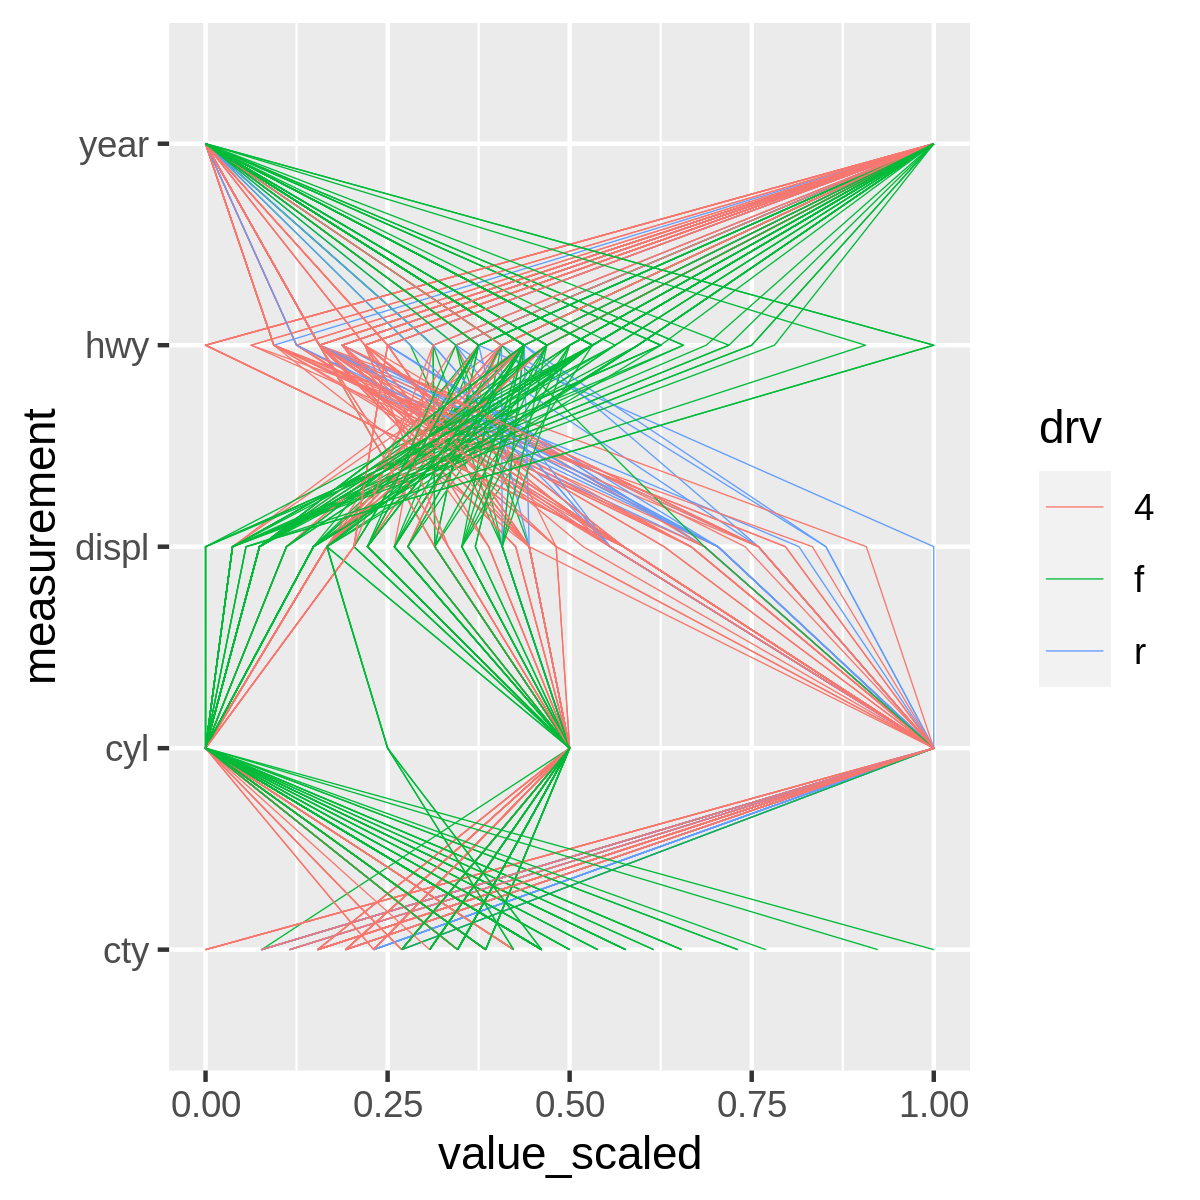

In [16]:
options(repr.plot.width = 4, repr.plot.height = 4, repr.plot.res = 300)
p = ggplot(mpg_long, aes(x = measurement, y = value_scaled, group = id, color = drv))
p = p + geom_line(size = 0.15)
p = p + coord_flip()
p